In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
import hddm
import numpy as np
import seaborn as sns
import os
import pandas as pd
from textwrap import wrap
# from jupyterthemes import jtplot
import matplotlib.pyplot as plt
%matplotlib inline

/home/kbond/.conda/envs/hddm_outside_slurm/lib/python2.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
sns.set_color_codes("muted")

In [4]:
home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
write_dir = os.path.join(home, 'analysis_revision/loki0.5_acc_av_models/subset_regression/')
print(write_dir)

/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/loki0.5_acc_av_models/subset_regression/


In [5]:
all_obs_data = hddm.load_csv(os.path.join(home, 'aggregated_data/loki_0.5/av_manifold_df.csv'))
all_obs_data_pared = all_obs_data.loc[(all_obs_data.shifted_epoch_trial <= 3) &
                                      (all_obs_data.shifted_epoch_trial >=-1)]

In [6]:
all_obs_data_pared = all_obs_data_pared.rename(index=str, columns={"p_accuracy": "response",
                                                       "subj_id": "subj_idx"})
all_obs_data_pared = all_obs_data_pared[['response', 'rt', 'reward_code', 'subj_idx','condition', 'ideal_B', 'cpp', 
                             'shifted_epoch_trial']] 
all_obs_data_pared.reset_index(drop=True, inplace=True)

In [7]:
all_obs_data.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,cpp,b_t0,b_t1,MC,H,signed_B_diff,ideal_B,...,theta_deg,a_est_z,v_est_z,theta_deg_360,theta_deg_abs_180,r_z,theta_radians_z,theta_deg_z,theta_deg_360_z,theta_deg_abs_180_z
0,0,0,0,0.076938,1.038488,3.199304,0.383517,0.0975,0.000000,-2.160816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,1,0.319389,1.073995,2.636439,0.604624,0.0975,2.160816,-1.562444,...,NaN,0.372983,-1.969731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,0.300755,1.210057,1.084931,0.467104,0.0975,1.562444,0.125126,...,92.897581,-0.833442,-1.514212,159.314616,159.314616,1.289558,2.780565,159.314616,159.314616,159.314616
3,3,3,3,0.365146,1.297258,2.998052,0.489297,0.0975,-0.125126,-1.700794,...,89.920968,-0.740719,-0.229528,85.871786,85.871786,1.288026,1.498745,85.871786,85.871786,85.871786
4,4,4,4,0.074485,1.371289,0.931292,0.456994,0.0975,1.700794,0.439997,...,-90.252403,-1.061126,-1.619533,257.019606,102.980394,1.426455,-1.797347,-102.980394,257.019606,102.980394


In [8]:
all_obs_data_pared['cpp_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).cpp.apply(lambda x: x.shift(1))
all_obs_data_pared['ideal_B_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).ideal_B.apply(lambda x: x.shift(1))

In [9]:
all_obs_data_pared.dropna(inplace=True) #need to drop nas for HDDMRegressor

In [10]:
a_cpp_v_B_all_subs = pd.read_csv(os.path.join(write_dir, 'a_cpp_v_B_model_traces.csv'))

In [11]:
a_cpp_v_B_all_subs.head()

,a_Intercept,a_Intercept_std,a_Intercept_subj.786,a_Intercept_subj.787,a_Intercept_subj.788,a_Intercept_subj.789,a_cpp_shifted,t,t_std,t_subj.786,t_subj.787,t_subj.788,t_subj.789,v_Intercept,v_Intercept_std,v_Intercept_subj.786,v_Intercept_subj.787,v_Intercept_subj.788,v_Intercept_subj.789,v_ideal_B_shifted
0,1.193840,0.502455,1.360768,1.533489,0.969791,1.456444,0.026147,0.343415,0.352701,0.123332,0.054637,0.226327,0.032129,0.119534,0.094002,0.022004,0.083666,0.159504,-0.024631,0.068627
1,1.444492,0.393539,1.362572,1.525644,0.963252,1.449917,-0.001313,0.569661,0.860687,0.118410,0.054205,0.223956,0.034018,0.081834,0.088463,0.121301,0.093416,0.186709,-0.055923,0.070024
2,1.424943,0.447421,1.349320,1.567771,0.970472,1.440845,0.024658,0.537358,0.660975,0.120846,0.050834,0.226415,0.033666,0.143209,0.084517,0.035502,0.150992,0.058489,-0.036327,0.079104
3,1.111693,0.411669,1.330101,1.537299,0.966236,1.444911,0.060364,0.664022,0.646187,0.120216,0.054072,0.227631,0.031411,-0.073666,0.226085,0.046668,0.084393,0.185704,-0.030317,0.041346
4,1.394674,0.292056,1.333663,1.547956,0.954530,1.459956,0.065908,0.277559,0.605079,0.122669,0.054242,0.227412,0.031172,0.088578,0.314539,0.140860,0.121018,0.270133,-0.008578,0.041286


# Group-level CP-evoked $\hat{\beta}$ (trials -1:3)

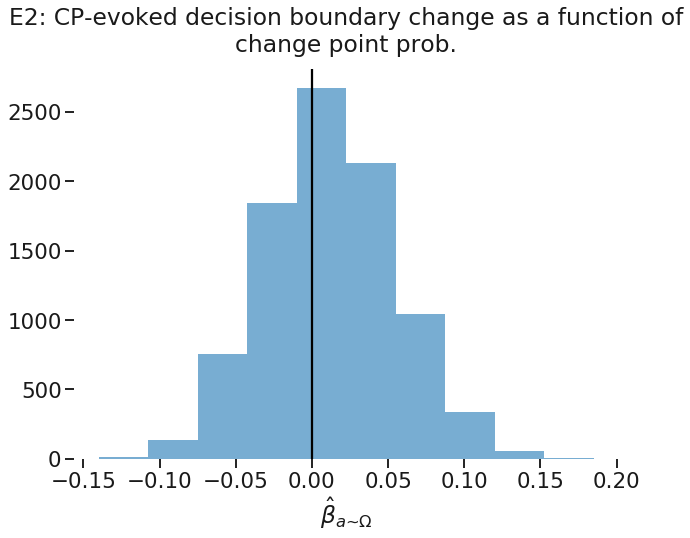

In [12]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)
plt.hist(a_cpp_v_B_all_subs['a_cpp_shifted'], alpha=0.6)
plt.xlabel(r'$\hat{\beta}_{a\textasciitilde\Omega}$')
plt.axvline(x=0, color='black')
sns.despine(bottom=True, left=True)
plt.title("\n".join(wrap("E2: CP-evoked decision boundary change as a function of change point prob.", 60)), y=1.03)
plt.tight_layout()


plt.savefig(os.path.join(write_dir, 'CP_evoked_boundary_beta_posterior.pdf'), bbox_inches='tight')

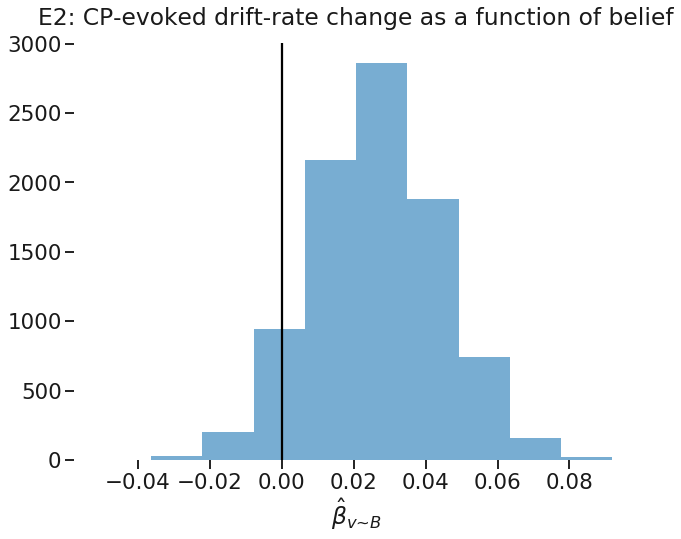

In [13]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)
plt.hist(a_cpp_v_B_all_subs['v_ideal_B_shifted'], alpha=0.6)
plt.xlabel(r'$\hat{\beta}_{v \textasciitilde B}$')
plt.axvline(x=0, color='black')
sns.despine(bottom=True, left=True)
plt.title("\n".join(wrap("E2: CP-evoked drift-rate change as a function of belief", 60)), y=1.03)

plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_drift_beta_posterior.pdf'), bbox_inches='tight')

### Calculating an estimate of trialwise decision parameters using group-level $\hat{\beta}$

In [14]:
grp_a_estimate = a_cpp_v_B_all_subs['a_Intercept'].mean() + a_cpp_v_B_all_subs['a_cpp_shifted'].mean() * all_obs_data_pared.cpp_shifted.values
grp_v_estimate = a_cpp_v_B_all_subs['v_Intercept'].mean() + a_cpp_v_B_all_subs['v_ideal_B_shifted'].mean() * all_obs_data_pared.ideal_B_shifted.values

In [15]:
all_obs_data_pared['grp_a_estimate'] = grp_a_estimate
all_obs_data_pared['grp_v_estimate'] = grp_v_estimate

### Calculating an estimate of trialwise decision parameters for each subject using sub-level $\hat{\beta_0}$ & group-level $\hat{\beta}$

In [16]:
for s in all_obs_data_pared.subj_idx.unique():
    
    print(s)
    
    dat = all_obs_data_pared.loc[all_obs_data_pared.subj_idx == s].copy().reset_index(drop=True)
    
    sub_a_estimate = a_cpp_v_B_all_subs['a_Intercept_subj.{}'.format(s)].mean() + a_cpp_v_B_all_subs['a_cpp_shifted'].mean() * dat.cpp_shifted
    sub_v_estimate = a_cpp_v_B_all_subs['v_Intercept_subj.{}'.format(s)].mean() + a_cpp_v_B_all_subs['v_ideal_B_shifted'].mean() * dat.ideal_B_shifted
    
    
    all_obs_data_pared.loc[all_obs_data_pared.subj_idx == s, 
                                'sub_a_estimate'] = sub_a_estimate.values
    
    all_obs_data_pared.loc[all_obs_data_pared.subj_idx == s, 
                                'sub_v_estimate'] = sub_v_estimate.values
    
assert all_obs_data_pared.sub_v_estimate.isna().sum() == 0, 'check v estimate'
assert all_obs_data_pared.sub_a_estimate.isna().sum() == 0, 'check a estimate'

786
787
788
789


In [17]:
all_obs_data_pared.head()

,response,rt,reward_code,subj_idx,condition,ideal_B,cpp,shifted_epoch_trial,cpp_shifted,ideal_B_shifted,grp_a_estimate,grp_v_estimate,sub_a_estimate,sub_v_estimate
1,1.0,0.500100,0,786,6510,-1.562444,0.319389,2.0,0.076938,-2.160816,1.419050,0.034884,1.353472,0.014903
2,1.0,0.534169,0,786,6510,0.125126,0.300755,3.0,0.319389,-1.562444,1.422023,0.050702,1.356445,0.030721
3,1.0,0.630004,0,786,6510,2.206471,0.077553,-1.0,0.300755,0.125126,1.421795,0.095313,1.356217,0.075332
4,1.0,0.596382,0,786,6510,-2.664951,0.463273,0.0,0.077553,2.206471,1.419058,0.150334,1.353480,0.130352
5,1.0,0.530803,0,786,6510,-0.102781,0.075790,1.0,0.463273,-2.664951,1.423788,0.021557,1.358210,0.001576


# Group-level CP-evoked responses 

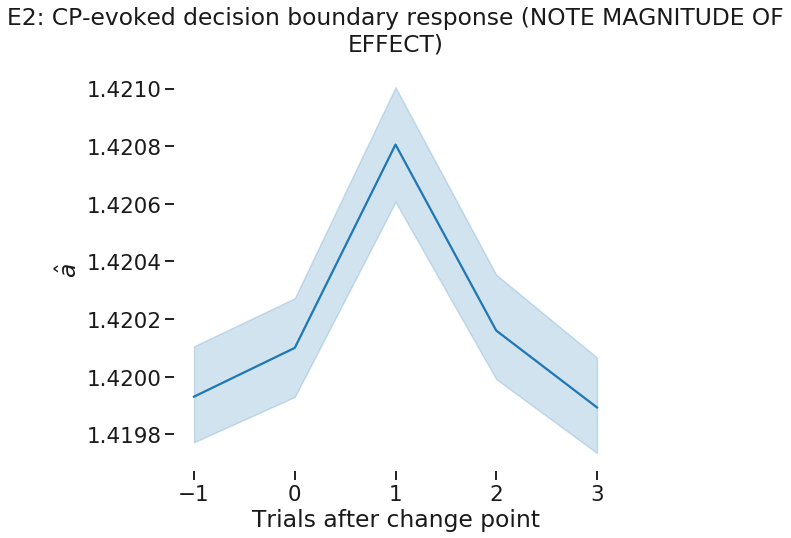

In [18]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)

sns.lineplot(x='shifted_epoch_trial', y='grp_a_estimate', data=all_obs_data_pared)
plt.xlabel('Trials after change point')
plt.ylabel(r'$\hat{a}$')
plt.title("\n".join(wrap("E2: CP-evoked decision boundary response (NOTE MAGNITUDE OF EFFECT)", 60)), y=1.03)

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_boundary_trialwise_estimate.pdf'), bbox_inches='tight')

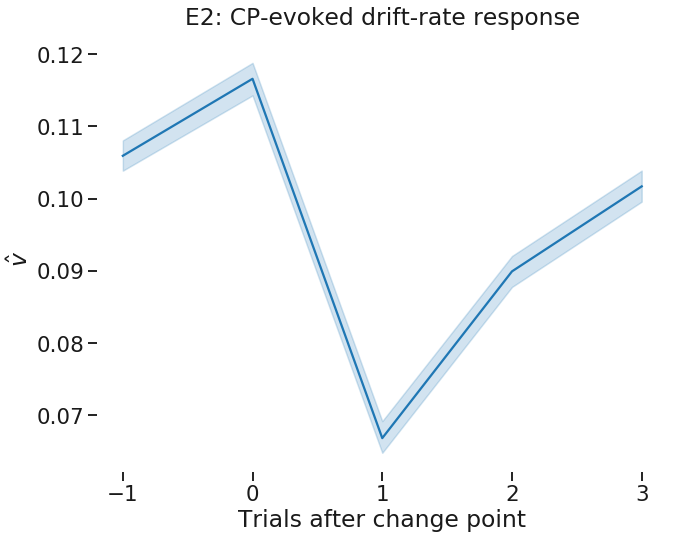

In [19]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)

plt.title("\n".join(wrap("E2: CP-evoked drift-rate response", 60)), y=1.03)

sns.lineplot(x='shifted_epoch_trial', y='grp_v_estimate', data=all_obs_data_pared)
plt.xlabel('Trials after change point')
plt.ylabel(r'$\hat{v}$')

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_drift_trialwise_estimate.pdf'), bbox_inches='tight')

# Sub-level CP-evoked responses 

<Figure size 720x576 with 0 Axes>

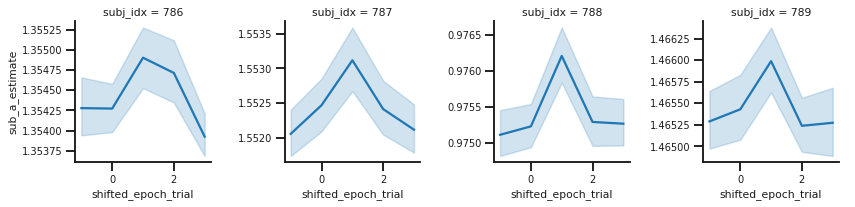

<Figure size 432x288 with 0 Axes>

In [20]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=0.6)

g = sns.FacetGrid(all_obs_data_pared, col="subj_idx", col_wrap=4, sharey=False,despine=True)
g.map(sns.lineplot, "shifted_epoch_trial","sub_a_estimate")
plt.show()
g.despine(bottom=True, left=True)
plt.tight_layout()

# g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
# g.fig.suptitle('Experiment 2')

<Figure size 720x576 with 0 Axes>

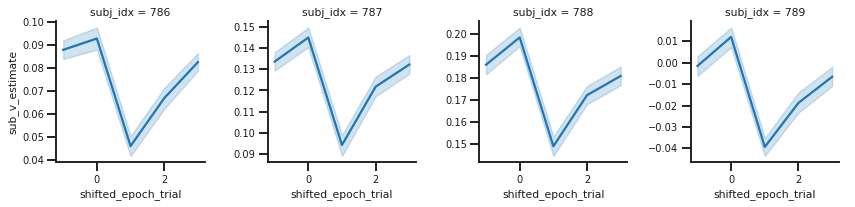

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=0.6)

g = sns.FacetGrid(all_obs_data_pared, col="subj_idx", col_wrap=4, sharey=False, despine=True)
g.map(sns.lineplot, "shifted_epoch_trial","sub_v_estimate")
plt.show()

g.despine(bottom=True, left=True)
plt.tight_layout()